# Wealth Across Denmark, Germany and the United Kingdom

Imports and set magics:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We have used a dataset of the net wealth across Denmark, United Kingdom and Germany divided into ten deciles each with data from 1996 to 2021. The data is currently in two seperate files which we will first read and clean and then merge into one file. This file will be base for our analysis and comparison of the net wealth across the three countries. The data comes from wid.world which is a database that focusses on wealth distribution and wealth inequality. 

We start by loading the data from an excel file named 'DK.xlsx' containing wealth data from Denmark and assigns it to the variable nwdk. We then change the index structure of nwdk so that it starts from 1. The first five rows of the nwdk data are printed to check if the index has been changed correctly and the data appears to be in order.

In [12]:
# Load in the wealth data from Denmark and change index structure so it starts from 1
nwdk = pd.read_excel('DK.xlsx')
nwdk.index= nwdk.index
# Print the head to inspect data to ensure index is changed and Danish data looks alright
print(nwdk.head(5))



   Year  DK1. decil  DK2. decil  DK3. decil  DK4. decil  DK5. decil   \
0  1995    144.2600    745.9645   2237.8936   5967.7163   14266.5719   
1  1996    140.9271    706.4804   2321.2929   6358.3239   15239.7923   
2  1997      6.9601    217.9862   1198.9239   4686.7025   13406.1489   
3  1998    477.6739   1528.1518   2468.5530   3408.9541   12695.4152   
4  1999    206.2599   1020.5656   2934.1261   7654.2420   18242.6101   

   DK6. decil  DK7. decil   DK8. decil   DK9. decil  DK10. decil           DK1  
0  31237.2652  62008.3026  113200.1194  184439.7332  435493.8701  1.600136e+06  
1  33608.2836  67115.6415  122624.8186  199833.0378  471589.2895  1.723438e+06  
2  32043.9657  66921.7514  126431.9734  210901.6108  537106.4356  2.135559e+06  
3  34207.0910  72175.7865  136475.7136  227341.9726  580266.1041  2.342703e+06  
4  39164.2050  77690.5564  142624.0428  235495.5125  636454.7998  2.725691e+06  


The same is now done for the Germany and the United Kingdom that is in a single Excel file DEUK.xlsx.

In [13]:
#Perform same task as above with the data from Germany and UK
nwdeuk = pd.read_excel('DEUK.xlsx')
nwdeuk.index= nwdeuk.index + 1
# Print the head to inspect data to ensure index is changed and Danish data looks alright
print(nwdeuk.head(5))

   Year  DE1. decil  DE2. decil  DE3. decil  DE4. decil  DE5. decil   \
1  1995  -7792.9574   1024.7396   5775.8046  13694.2465   38171.1875   
2  1996  -8133.2176   1070.3703   6032.9962  14206.7329   36255.2849   
3  1997  -8567.2710   1124.4604   6337.8676  14924.6559   35010.6384   
4  1998  -8992.8321   1178.5482   6642.7260  15749.6889   38682.0671   
5  1999 -10538.4397    999.3080   6439.9848  16099.9621   45340.6336   

   DE6. decil   DE7. decil   DE8. decil   DE9. decil  ...  UK2. decil  \
1  56483.8445   81336.7360  120697.0571  192639.6379  ...   1308.0469   
2  55492.7831   81636.0498  124797.1034  203103.5863  ...    739.9037   
3  54563.7498   82175.9137  128020.0328  212706.1433  ...    792.6937   
4  60090.0814   90651.8672  141588.1770  236078.7227  ...    738.2074   
5  69392.2958  104819.7443  161698.6753  262780.6612  ...   1950.1347   

   UK3. decil  UK4. decil  UK5. decil   UK6. decil  UK7. decil   UK8. decil  \
1  10226.5487  24020.4981   31613.3568  49915.826

# Read and clean data

We now merge our two datasets to work on the data as one file. 

To merge the to datasets we know that they have a similar year column. Therefore, we start by dropping the year column in nwdeuk and renames the dataset to nwdeuk_dropped.

We then merge the two datasets into one and name it netwealth. 

In [14]:
nwdeuk_dropped = nwdeuk.drop(columns='Year')

#merge dataframes
netwealth = pd.concat([nwdk, nwdeuk_dropped], axis=1, join='inner')
display(netwealth)

,Year,DK1. decil,DK2. decil,DK3. decil,DK4. decil,DK5. decil,DK6. decil,DK7. decil,DK8. decil,DK9. decil,...,UK2. decil,UK3. decil,UK4. decil,UK5. decil,UK6. decil,UK7. decil,UK8. decil,UK9. decil,UK10. decil,UK1
1,1996,140.9271,706.4804,2321.2929,6358.3239,15239.7923,33608.2836,67115.6415,122624.8186,199833.0378,...,1308.0469,10226.5487,24020.4981,31613.3568,49915.8265,73542.6511,108816.5018,172265.0635,5.964700e+05,1.975895e+06
2,1997,6.9601,217.9862,1198.9239,4686.7025,13406.1489,32043.9657,66921.7514,126431.9734,210901.6108,...,739.9037,7522.3551,20840.6230,30859.3944,48792.7784,71849.9863,106202.8971,169551.9936,6.368561e+05,2.096353e+06
3,1998,477.6739,1528.1518,2468.5530,3408.9541,12695.4152,34207.0910,72175.7865,136475.7136,227341.9726,...,792.6937,6341.5496,19024.6488,31654.4037,49498.1988,73086.2294,107429.4241,172815.9336,7.158689e+05,2.464734e+06
4,1999,206.2599,1020.5656,2934.1261,7654.2420,18242.6101,39164.2050,77690.5564,142624.0428,235495.5125,...,738.2074,7677.3568,21998.5801,32105.6499,50307.2782,73691.3146,107440.1671,171904.2673,8.026184e+05,2.815869e+06
5,2000,622.2072,2436.9850,5686.2983,12049.5370,23963.6859,46438.1031,85971.4154,150957.6822,246000.0973,...,1950.1347,10725.7412,26164.3082,34720.3557,54619.3736,79184.3684,114453.6624,181973.0892,8.543407e+05,2.988658e+06
6,2001,429.1632,1885.8601,4579.9461,10641.6394,22899.7303,47011.7993,89982.4698,160702.2252,260518.1085,...,1538.5114,10598.6343,27180.3687,37603.2761,58755.1188,84607.3711,122210.6472,194185.6678,9.138207e+05,3.130374e+06
7,2002,25.2331,397.4503,2119.7351,7154.1058,18812.6486,43587.0520,89558.8060,165869.2680,269338.8353,...,1940.4556,11289.9231,29283.2380,39791.5691,62014.7851,88742.7070,127333.0213,201510.5123,9.314450e+05,3.242659e+06
8,2003,481.7007,2034.0309,5017.2762,11390.5729,24272.7685,49087.9452,93294.2162,165841.3175,267136.0552,...,904.9251,10859.1009,30948.4378,42742.7739,66488.7594,94830.7422,134969.1176,210037.0719,9.609839e+05,3.254001e+06
9,2004,888.8689,3544.9490,7680.7229,15361.4458,29984.3605,56128.3595,101326.4596,174736.4456,279755.5604,...,957.8431,12451.9608,34482.3530,46652.9563,73078.7567,103745.7349,146810.0022,226739.8923,9.986939e+05,3.231966e+06
10,2005,1566.6732,5797.6778,12277.4354,22508.6316,40072.1849,69231.0940,116976.6761,192005.4479,299433.0076,...,1410.3742,14708.1874,38684.5478,53167.2706,82804.4316,116752.4524,164351.5291,252005.6779,1.042366e+06,3.513859e+06


We are very happy with the result - Very good dataframe where there is no overlap since we removed the year clumn from nwdeuk. Let's now take a look at the wealth level for each country by plotting the average wealth across each year for each country

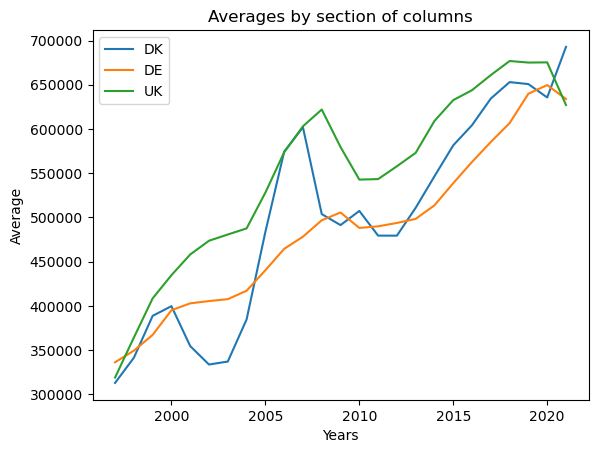

In [15]:
# Select the rows and columns you want to calculate the average for
netwealth_subset = netwealth.iloc[1:, [i for i in range(2, 12)] + [i for i in range(13, 23)] + [i for i in range(24, 34)]]

# Calculate the averages for each section of columns
avg_dk = netwealth_subset.iloc[:, 0:10].mean(axis=1)
avg_de = netwealth_subset.iloc[:, 10:20].mean(axis=1)
avg_uk = netwealth_subset.iloc[:, 20:30].mean(axis=1)

# Add the averages to the dataframe
netwealth.iloc[1:, 1] = avg_dk
netwealth.iloc[1:, 12] = avg_de
netwealth.iloc[1:, 23] = avg_uk

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the averages for each section of columns
ax.plot(netwealth['Year'][1:], avg_dk, label='DK')
ax.plot(netwealth['Year'][1:], avg_de, label='DE')
ax.plot(netwealth['Year'][1:], avg_uk, label='UK')

# Add axis labels and a legend
ax.set_xlabel('Years')
ax.set_ylabel('Average')
ax.set_title('Averages by section of columns')
ax.legend()

From the graphs we see that all countries overall have a relatively uniform growth path all more than doubling over the period. All three countries decresed in average wealth during the financial crisis in 2008. Germany was relatively less affected by the economic downturn but the average wealth before this downturn was rising at a lower rate than Denmark and the UK. The UK has a higher average wealth than DK and DE in the whole period except for 2020 where Covid-19 hit and the UK where relatively more affected than DK and DE. 

The next step is to calculate the average lorenz curve across the year. We will then also look at the gini-coefficient for the wealth. This will give an initial idea of how wealth differentiates across the three countries. 

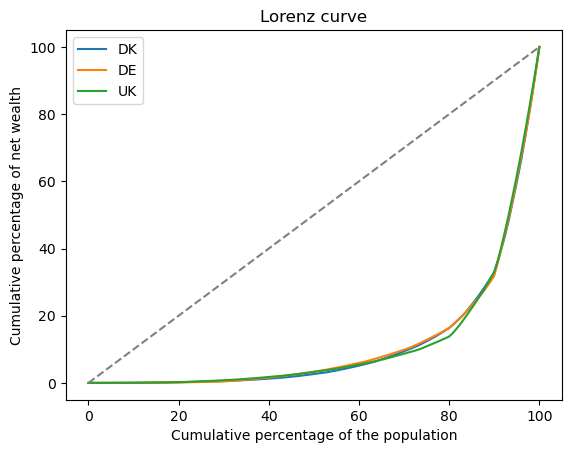

In [16]:
# Calculate the Lorenz curve for the netwealth dataframe
pop_perc, cumperc_dk = dataproject.lorenz_curve(netwealth.iloc[1:, 2:12].values.flatten())
_, cumperc_de = dataproject.lorenz_curve(netwealth.iloc[1:, 13:23].values.flatten())
_, cumperc_uk = dataproject.lorenz_curve(netwealth.iloc[1:, 24:34].values.flatten())

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the Lorenz curve for each section of columns
ax.plot(pop_perc, cumperc_dk, label='DK')
ax.plot(pop_perc, cumperc_de, label='DE')
ax.plot(pop_perc, cumperc_uk, label='UK')
ax.plot([0, 100], [0, 100], linestyle='--', color='gray')

# Add axis labels and a legend
ax.set_xlabel('Cumulative percentage of the population')
ax.set_ylabel('Cumulative percentage of net wealth')
ax.set_title('Lorenz curve')
ax.legend()

In [17]:
# Calculate the Gini coefficient for each section of columns of the netwealth dataframe
gini_dk = dataproject.gini_coefficient(netwealth.iloc[1:, 2:12].values.flatten())
gini_de = dataproject.gini_coefficient(netwealth.iloc[1:, 13:23].values.flatten())
gini_uk = dataproject.gini_coefficient(netwealth.iloc[1:, 24:34].values.flatten())

# Print the Gini coefficients
print('Gini coefficient for DK:', gini_dk)
print('Gini coefficient for DE:', gini_de)
print('Gini coefficient for UK:', gini_uk)

Gini coefficient for DK: 22.46230170547746
Gini coefficient for DE: 22.883743416954843
Gini coefficient for UK: 22.470167512970107


Even though it is very similar we do however see some differences in the lorenz curve and gini coefficient. it is clear that Denmark has then lowest gini coeffeficient while Germany has the highest. 

We now calculate and plot the Lorenz curve for the net wealth data of Denmark, Germany and the United Kingdom. We have constructed three seperate curves for 1995, 2009 and 2021 in order to see the change in inequality over time. The Lorenz curve represents the distribution of wealth in the populations to compare the degree of inequality in the societies.

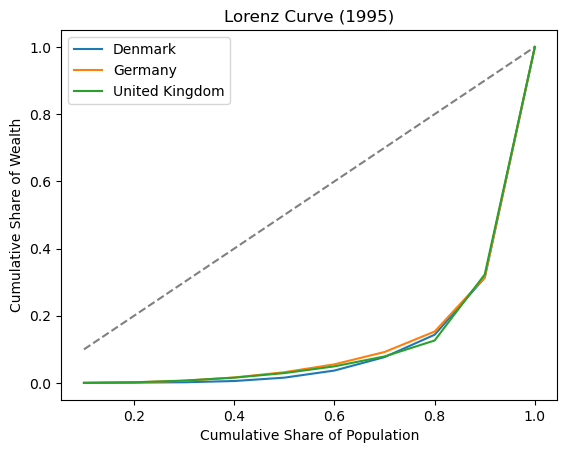

In [18]:
# Calculate the cumulative share of wealth for each decile in 1995
dk_cumulative_share_1995 = netwealth.iloc[2, 2:12].cumsum() / netwealth.iloc[2, 2:12].sum()
de_cumulative_share_1995 = netwealth.iloc[2, 13:23].cumsum() / netwealth.iloc[2, 13:23].sum()
uk_cumulative_share_1995 = netwealth.iloc[2, 24:34].cumsum() / netwealth.iloc[2, 24:34].sum()

# Calculate the cumulative share of the population for each decile in 1995
population_share = [i/10 for i in range(1, 11)]

# Create the Lorenz curves
plt.plot(population_share, population_share, linestyle='--', color='gray')  # 45-degree line
plt.plot(population_share, dk_cumulative_share_1995, label='Denmark')
plt.plot(population_share, de_cumulative_share_1995, label='Germany')
plt.plot(population_share, uk_cumulative_share_1995, label='United Kingdom')

# Add labels and legend
plt.xlabel('Cumulative Share of Population')
plt.ylabel('Cumulative Share of Wealth')
plt.title('Lorenz Curve (1995)')
plt.legend()

# Show the plot
plt.show()

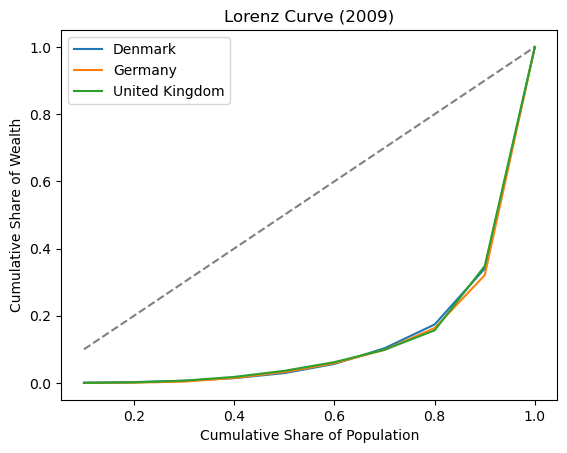

In [19]:
# Calculate the cumulative share of wealth for each decile in 2009
dk_cumulative_share_2009 = netwealth.iloc[16, 2:12].cumsum() / netwealth.iloc[16, 2:12].sum()
de_cumulative_share_2009 = netwealth.iloc[16, 13:23].cumsum() / netwealth.iloc[16, 13:23].sum()
uk_cumulative_share_2009 = netwealth.iloc[16, 24:34].cumsum() / netwealth.iloc[16, 24:34].sum()

# Calculate the cumulative share of the population for each decile in 2009
population_share = [i/10 for i in range(1, 11)]

# Create the Lorenz curves
plt.plot(population_share, population_share, linestyle='--', color='gray')  # 45-degree line
plt.plot(population_share, dk_cumulative_share_2009, label='Denmark')
plt.plot(population_share, de_cumulative_share_2009, label='Germany')
plt.plot(population_share, uk_cumulative_share_2009, label='United Kingdom')

# Add labels and legend
plt.xlabel('Cumulative Share of Population')
plt.ylabel('Cumulative Share of Wealth')
plt.title('Lorenz Curve (2009)')
plt.legend()

# Show the plot
plt.show()

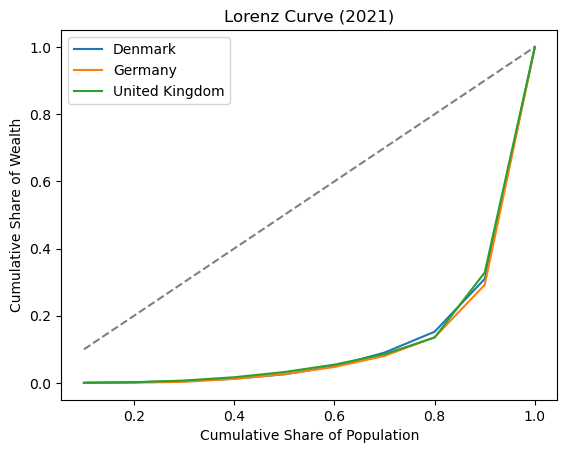

In [20]:
# Calculate the cumulative share of wealth for each decile in 2021
dk_cumulative_share_2021 = netwealth.iloc[25, 2:12].cumsum() / netwealth.iloc[25, 2:12].sum()
de_cumulative_share_2021 = netwealth.iloc[25, 13:23].cumsum() / netwealth.iloc[25, 13:23].sum()
uk_cumulative_share_2021 = netwealth.iloc[25, 24:34].cumsum() / netwealth.iloc[25, 24:34].sum()

# Calculate the cumulative share of the population for each decile in 2021
population_share = [i/10 for i in range(1, 11)]

# Create the Lorenz curves
plt.plot(population_share, population_share, linestyle='--', color='gray')  # 45-degree line
plt.plot(population_share, dk_cumulative_share_2021, label='Denmark')
plt.plot(population_share, de_cumulative_share_2021, label='Germany')
plt.plot(population_share, uk_cumulative_share_2021, label='United Kingdom')

# Add labels and legend
plt.xlabel('Cumulative Share of Population')
plt.ylabel('Cumulative Share of Wealth')
plt.title('Lorenz Curve (2021)')
plt.legend()

# Show the plot
plt.show()

The results show a very clear resemblence between Denmark, United Kingdom, and Germany looking at wealth inequality and the inequality is relatively unchanged from 1995 to 2021. The three countries have almost the same relationship between cumulative percentage of net wealth and of the population over the period and all three indicate that the net wealth is quite evenly distributed between the population. However, UK can be seen as the country with the highest wealth inequality of the three, whereas DK has the lowest which can also be seen in the constructed Gini coefficients above the lorenz curves. 